In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lung_poumon = pd.read_csv('lung_cancer.csv')
data = lung_poumon.copy()


In [3]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


# Feature Eng

In [4]:
# describe
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Types
data.dtypes

id                      int64
age                   float64
gender                 object
country                object
diagnosis_date         object
cancer_stage           object
family_history         object
smoking_status         object
bmi                   float64
cholesterol_level       int64
hypertension            int64
asthma                  int64
cirrhosis               int64
other_cancer            int64
treatment_type         object
end_treatment_date     object
survived                int64
dtype: object

In [6]:
# Missing values
data.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [7]:
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'], format='%Y-%m-%d')
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'], format='%Y-%m-%d')
data.dtypes

id                             int64
age                          float64
gender                        object
country                       object
diagnosis_date        datetime64[ns]
cancer_stage                  object
family_history                object
smoking_status                object
bmi                          float64
cholesterol_level              int64
hypertension                   int64
asthma                         int64
cirrhosis                      int64
other_cancer                   int64
treatment_type                object
end_treatment_date    datetime64[ns]
survived                       int64
dtype: object

In [8]:
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [9]:
data = data.drop(['id'], axis=1)

In [10]:
data

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


Text(0.5, 1.0, 'Age Boxplot')

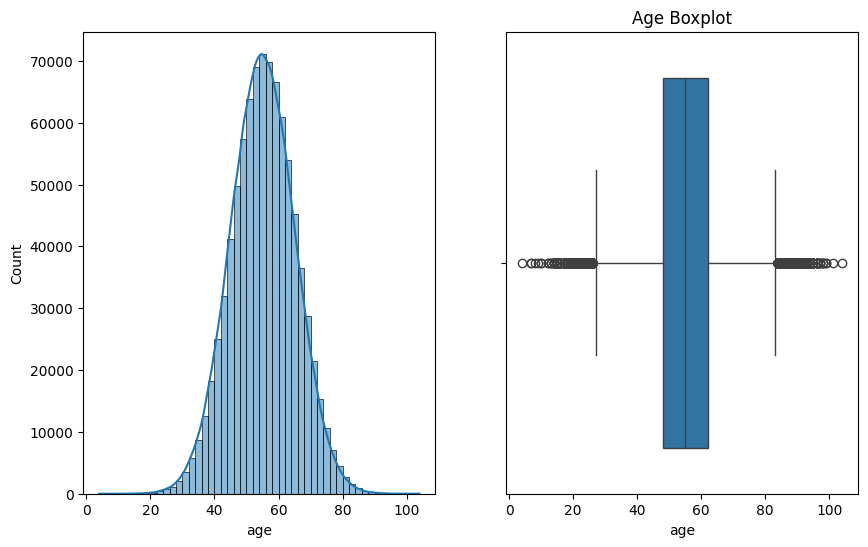

In [11]:
age= data['age']
fig, ax = plt.subplots(1,2,figsize=(10, 6),)
sns.histplot(age, kde=True, bins=50,ax=ax[0])
plt.title('Age Distribution')
sns.boxplot(x=age, ax=ax[1])
plt.title('Age Boxplot')


country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

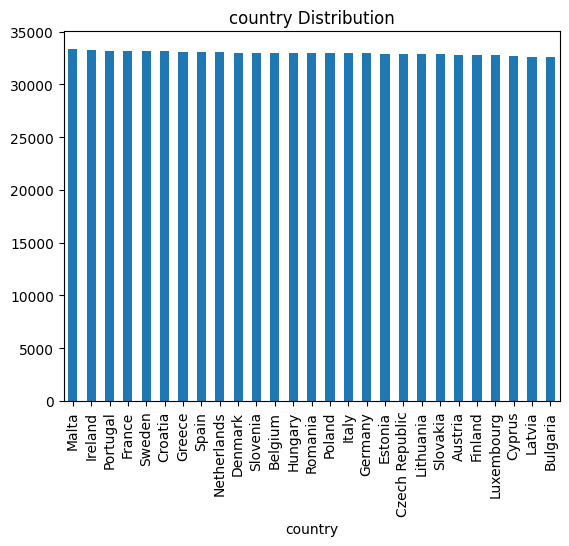

In [12]:
data['country'].value_counts().plot(kind='bar', title='country Distribution')
data['country'].value_counts()

In [13]:
# Fonction pour convertir pays → continent
import pycountry_convert as pc
def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continents = {
            'AF': 'Afrique',
            'AS': 'Asie',
            'EU': 'Europe',
            'NA': 'Amérique du Nord',
            'SA': 'Amérique du Sud',
            'OC': 'Océanie'
        }
        return continents[continent_code]
    except:
        return 'Inconnu'

<Axes: title={'center': 'Continent Distribution'}, xlabel='continent'>

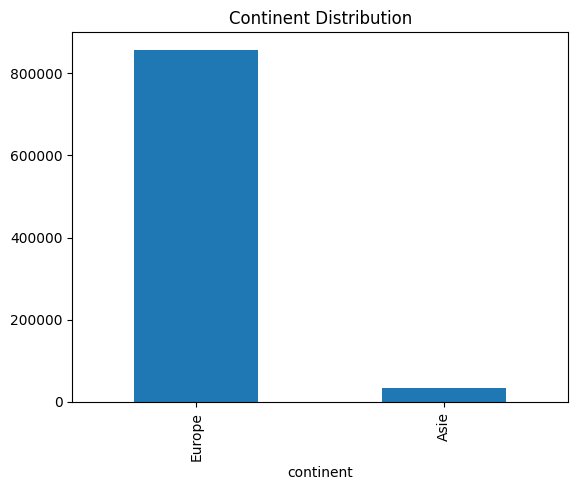

In [14]:
data['continent'] = data['country'].apply(get_continent)
data['continent'].value_counts().plot(kind='bar', title='Continent Distribution')

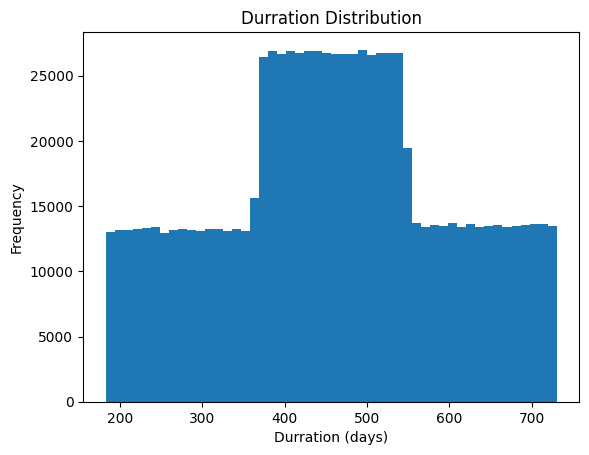

In [15]:
data['durration'] = (data['end_treatment_date'] - data['diagnosis_date']).dt.days
data['durration'].describe()
data['durration'].plot(kind='hist', bins=50, title='Durration Distribution')
plt.xlabel('Durration (days)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='asthma', ylabel='Count'>

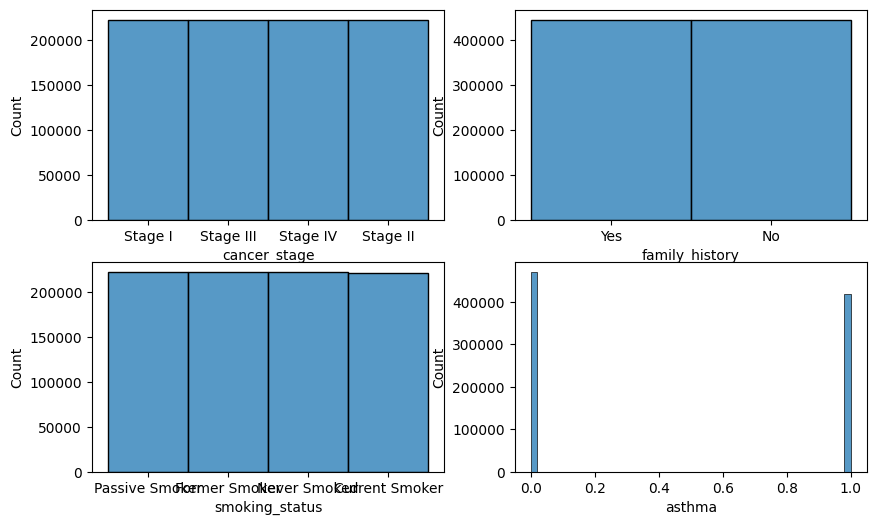

In [16]:
fig,axe= plt.subplots(2,2,figsize=(10, 6),)
sns.histplot(x='cancer_stage', data=data, ax=axe[0,0])
sns.histplot(x='family_history', data=data, ax=axe[0,1])
sns.histplot(x='smoking_status', data=data, ax=axe[1,0])
sns.histplot(x='asthma', data=data, ax=axe[1,1])

<Axes: title={'center': 'Survived Distribution'}, xlabel='survived'>

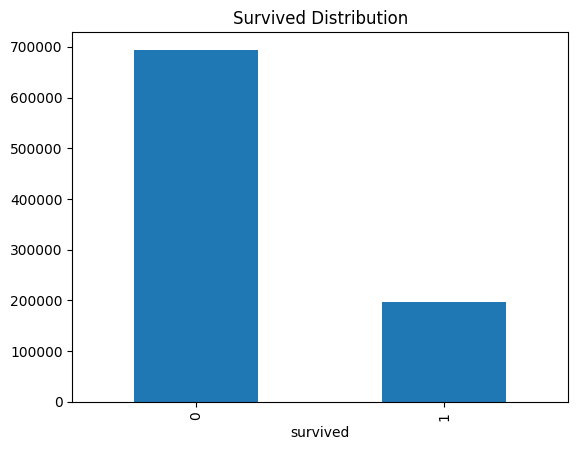

In [17]:
data['survived'].value_counts().plot(kind='bar', title='Survived Distribution')

In [18]:
data

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,continent,durration
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,Europe,523
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,Europe,424
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,Europe,370
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,Europe,443
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,Europe,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0,Europe,237
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0,Asie,631
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1,Europe,302
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0,Europe,721


In [94]:
sns.countplot(x='continent', hue='survived', data=data)

ValueError: Could not interpret value `continent` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='age', ylabel='durration'>

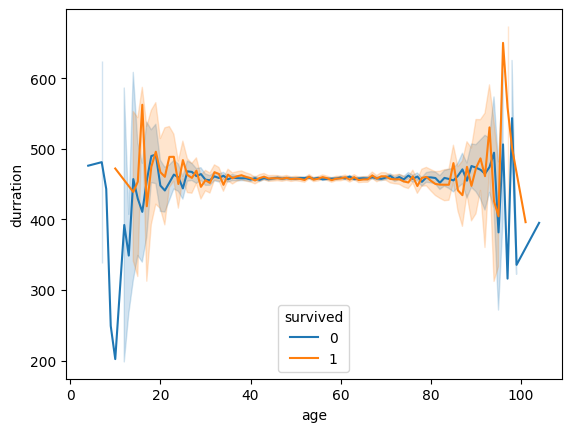

In [20]:
sns.lineplot(x='age', y='durration', hue='survived', data=data)

<Axes: xlabel='age', ylabel='cholesterol_level'>

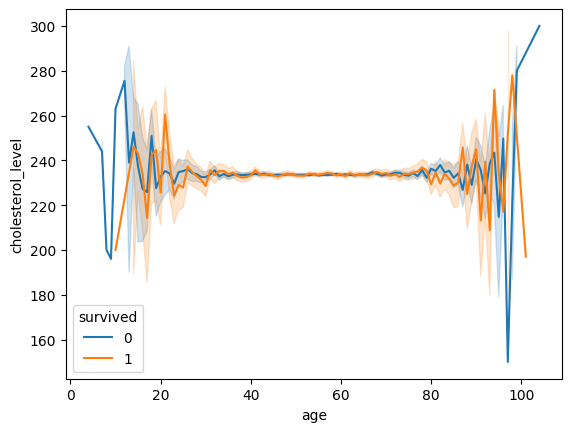

In [21]:
sns.lineplot(x='age', y='cholesterol_level',hue='survived', data=data)

# SKlearn

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import minmax_scale, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [23]:
data_preprocessed = data.copy()
cat_data= data_preprocessed.select_dtypes(include=['object'])
num_data= data_preprocessed.select_dtypes(exclude=['object'])
encoded=LabelEncoder()


In [24]:
for cal in cat_data.columns:
    data_preprocessed[cal] = encoded.fit_transform(data_preprocessed[cal])

In [25]:
data_preprocessed

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,continent,durration
0,64.0,1,26,2016-04-05,0,1,3,29.4,199,0,0,1,0,0,2017-09-10,0,1,523
1,50.0,0,19,2023-04-20,2,1,3,41.2,280,1,1,0,0,3,2024-06-17,1,1,424
2,65.0,0,12,2023-04-05,2,1,1,44.0,268,1,1,0,0,1,2024-04-09,0,1,370
3,51.0,0,1,2016-02-05,0,0,3,43.0,241,1,1,0,0,0,2017-04-23,0,1,443
4,37.0,1,17,2023-11-29,0,0,3,19.7,178,0,0,0,0,1,2025-01-08,0,1,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,1,18,2022-07-01,3,0,3,44.8,243,1,1,1,0,2,2023-02-23,0,1,237
889996,62.0,0,4,2015-09-27,1,1,1,21.6,240,0,0,0,0,3,2017-06-19,0,0,631
889997,48.0,0,7,2016-03-27,2,1,2,38.6,242,1,0,0,0,1,2017-01-23,1,1,302
889998,67.0,0,23,2015-12-22,3,1,1,18.6,194,1,1,0,0,0,2017-12-12,0,1,721


In [26]:
x=data_preprocessed.drop(['survived','diagnosis_date','end_treatment_date'],axis=1)
x=minmax_scale(x)
x=pd.DataFrame(x,columns=data_preprocessed.drop(['survived','diagnosis_date','end_treatment_date'],axis=1).columns)
y=data_preprocessed['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [152]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_size,train_score,test_score= learning_curve(
    estimator=lg(class_weight='balanced', random_state=42),
    X=x_train,
    y=y_train,
    cv=cv,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 50)
)


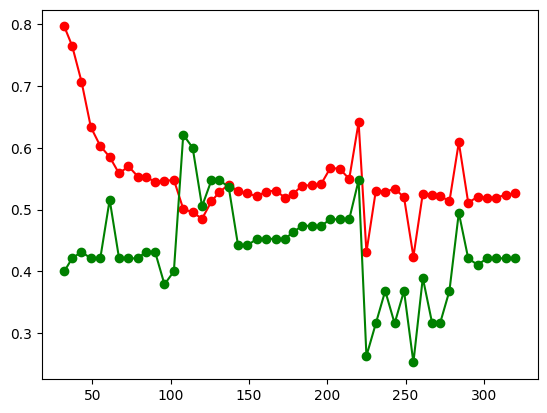

In [153]:
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
plt.plot(train_size, mean_train_score, 'o-', color="r", label="Training score")
plt.plot(train_size, mean_test_score, 'o-', color="g", label="Cross-validation score")

In [154]:
from sklearn.ensemble import RandomForestClassifier as rf
train_size2,train_score2,test_score2= learning_curve(
    estimator=rf(class_weight='balanced', random_state=42),
    X=x_train,
    y=y_train,
    cv=cv,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 50)
)


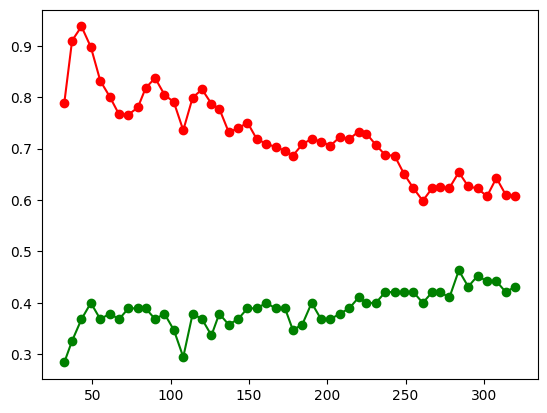

In [155]:
mean_train_score = np.mean(train_score2, axis=1)
mean_test_score = np.mean(test_score2, axis=1)
plt.plot(train_size2, mean_train_score, 'o-', color="r", label="Training score")
plt.plot(train_size2, mean_test_score, 'o-', color="g", label="Cross-validation score")

In [156]:
from sklearn.ensemble import HistGradientBoostingClassifier as hgb
train_size3,train_score3,test_score3= learning_curve(
    estimator=hgb(class_weight='balanced', random_state=42),
    X=x_train,
    y=y_train,
    cv=cv,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 50)
)


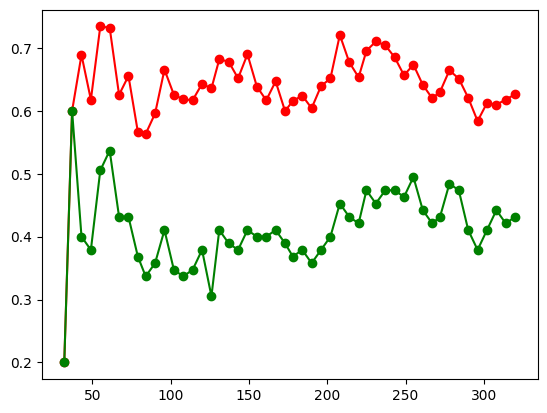

In [157]:
mean_train_score = np.mean(train_score3, axis=1)
mean_test_score = np.mean(test_score3, axis=1)
plt.plot(train_size3, mean_train_score, 'o-', color="r", label="Training score")
plt.plot(train_size3, mean_test_score, 'o-', color="g", label="Cross-validation score")

In [109]:
lg()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [132]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv=GridSearchCV(estimator=lg(class_weight='balanced', random_state=42),
                param_grid=parameters,
                scoring='recall',
                cv=cv,
                refit=True,
                return_train_score=True,)
cv.fit(x_train,y_train)


/Users/toure/Desktop/Project/ML/cancer_poumon/Cancer-de-poumon/env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/toure/Desktop/Project/ML/cancer_poumon/Cancer-de-poumon/env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/toure/Desktop/Project/ML/cancer_poumon/Cancer-de-poumon/env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/toure/Desktop/Project/ML/cancer_poumon/Cancer-de-poumon/env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/toure/Desktop/Project/ML/cancer_poumon/Cancer-de-poumon/env/lib/pytho

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': ['balanced', None], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], ...}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,penalty,'l2'


In [133]:
print("Best parameters:", cv.best_params_)
print("Best recall score:", cv.best_score_)
print("Training set score:", cv.score(x_train, y_train))

Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001}
Best recall score: 0.8
Training set score: 1.0


In [134]:
cv_resultat=cv.cv_results_
cv_resultat=pd.DataFrame(cv_resultat)
cv_resultat

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_random_state,param_solver,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002779,0.002947,0.001669,0.000524,0.01,balanced,100,l1,0,liblinear,...,0.200000,0.400000,1864,0.0,0.0,0.0,0.0,1.000000,0.200000,0.400000
1,0.001280,0.000198,0.001369,0.000287,0.01,balanced,100,l1,0,liblinear,...,0.200000,0.400000,1864,0.0,0.0,0.0,0.0,1.000000,0.200000,0.400000
2,0.000852,0.000057,0.001052,0.000154,0.01,balanced,100,l1,0,liblinear,...,0.200000,0.400000,1864,0.0,0.0,0.0,0.0,1.000000,0.200000,0.400000
3,0.002156,0.001350,0.001060,0.000063,0.01,balanced,100,l1,0,saga,...,0.368421,0.453976,1815,0.0,0.0,0.0,1.0,0.921053,0.384211,0.471222
4,0.001374,0.000530,0.000986,0.000023,0.01,balanced,100,l1,0,saga,...,0.368421,0.453976,1815,0.0,0.0,0.0,1.0,0.921053,0.384211,0.471222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,0.000857,0.000097,0.001017,0.000055,100.00,None,300,l2,10,liblinear,...,0.000000,0.000000,1981,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3956,0.000747,0.000041,0.001042,0.000130,100.00,None,300,l2,10,liblinear,...,0.000000,0.000000,1981,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3957,0.005462,0.000472,0.001219,0.000107,100.00,None,300,l2,10,saga,...,0.000000,0.000000,1981,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3958,0.000953,0.000123,0.001019,0.000055,100.00,None,300,l2,10,saga,...,0.000000,0.000000,1981,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [144]:
mean_test_score = cv_resultat['mean_test_score']
mean_train_score = cv_resultat['mean_train_score']
mean_train_score, mean_test_score

(0       0.200000
 1       0.200000
 2       0.200000
 3       0.384211
 4       0.384211
           ...   
 3955    0.000000
 3956    0.000000
 3957    0.000000
 3958    0.000000
 3959    0.000000
 Name: mean_train_score, Length: 3960, dtype: float64,
 0       0.200000
 1       0.200000
 2       0.200000
 3       0.368421
 4       0.368421
           ...   
 3955    0.000000
 3956    0.000000
 3957    0.000000
 3958    0.000000
 3959    0.000000
 Name: mean_test_score, Length: 3960, dtype: float64)

In [158]:
train_size,train_score,test_score= learning_curve(
    estimator=lg(penalty='l2', random_state=0, solver='liblinear', tol=0.01, C=0.1, max_iter=100, class_weight='balanced'),
    X=x_train,
    y=y_train,
    cv=cv,
    scoring='recall',
    train_sizes=np.linspace(0.1, 1.0, 50)
)

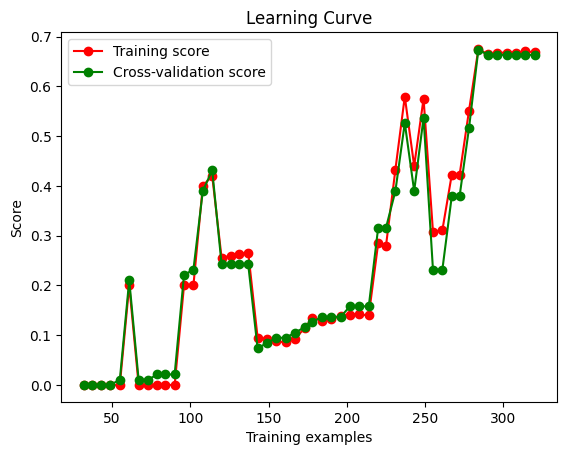

In [159]:
mean_test=np.mean(test_score, axis=1)
mean_train=np.mean(train_score, axis=1)
plt.plot(train_size, mean_train, 'o-', color="r", label="Training score")
plt.plot(train_size, mean_test, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()